In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

<h2>Importando archivo csv<h2>

In [14]:
data=pd.read_csv("C:/Users/jcruz/Documents/TTB_2020_2_13/csv_datatests/complete_data.csv")
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

,case,record,condition,cond_id,length,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,...,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy,hst_mean,hst_variance,hst_skewness,hst_spectral_entropy
0,p013259,3160963_0003,congestive_heartfailure,1,9298,0.647493,0.002654,-0.364385,1.602301,0.572303,...,-0.238522,1.813809,0.647212,0.010767,-0.271652,1.823859,0.033024,0.000654,-0.363400,2.893316
1,p002301,3997084_0005,congestive_heartfailure,1,6966,1.019846,0.051613,-3.496335,3.437762,0.901530,...,0.171172,2.531592,0.886865,0.030350,4.598883,3.642039,0.149075,0.011090,3.446796,3.395791
2,p002301,3997084_0009,congestive_heartfailure,1,32876,0.921765,0.033204,-1.000909,3.263621,0.683735,...,-0.072598,3.477169,0.976094,0.011880,0.245124,2.794989,0.144738,0.002401,0.550122,4.527932
3,p002301,3997084_0011,congestive_heartfailure,1,8479,1.018972,0.019299,0.217564,2.510086,0.698120,...,-0.504723,3.169939,1.018889,0.001953,-0.216696,3.379764,0.116002,0.001449,-0.128817,3.375357
4,p002301,3997084_0015,congestive_heartfailure,1,25109,0.953086,0.012919,-0.675644,4.345543,0.745497,...,0.249928,4.957422,0.950054,0.003002,1.170946,4.599694,0.150494,0.004536,1.337027,4.189462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18217,p098347,3954001_0198,congestive_heartfailure,1,11588,0.592128,0.061313,-0.214702,2.065008,0.494335,...,-0.527879,2.352396,0.590155,0.031546,-1.080919,1.912921,0.038325,0.001427,2.863040,3.712695
18218,p098347,3954001_0201,congestive_heartfailure,1,3749,0.612485,0.046043,-1.724214,2.316535,0.535639,...,1.261620,1.489856,0.804268,0.086023,2.640005,2.437046,0.090858,0.031447,3.124302,2.573556
18219,p098347,3954001_0213,congestive_heartfailure,1,15626,0.798957,0.014990,-0.265130,3.714690,0.738482,...,0.674673,3.405851,0.764127,0.003517,-0.859689,3.714658,0.026720,0.000998,3.957342,4.487133
18220,p098347,3954001_0228,congestive_heartfailure,1,3053,0.307336,0.016550,-1.070943,2.123888,0.218783,...,0.663699,1.118300,0.515476,0.168657,2.535542,2.205370,0.077795,0.048628,2.844713,2.321460


<h2>Limpieza dataframe<h2>

In [15]:
#Extract metrics
data = data[["cond_id","hst_mean","hst_variance","ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

data = data.dropna()
#data = data[ data["hurst"] >= 0.1]
data

,cond_id,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,1,0.033024,0.000654,0.647493,0.002654,-0.364385,1.602301,0.572303,0.001357,-0.261338,...,-0.089497,3.122093,0.299098,0.004980,-0.238522,1.813809,0.647212,0.010767,-0.271652,1.823859
1,1,0.149075,0.011090,1.019846,0.051613,-3.496335,3.437762,0.901530,0.047658,-2.545573,...,-0.757325,2.313477,0.444987,0.001013,0.171172,2.531592,0.886865,0.030350,4.598883,3.642039
2,1,0.144738,0.002401,0.921765,0.033204,-1.000909,3.263621,0.683735,0.061125,-0.111912,...,-0.396855,2.512676,0.547563,0.006213,-0.072598,3.477169,0.976094,0.011880,0.245124,2.794989
3,1,0.116002,0.001449,1.018972,0.019299,0.217564,2.510086,0.698120,0.024476,0.121061,...,0.348624,2.763180,0.599209,0.002594,-0.504723,3.169939,1.018889,0.001953,-0.216696,3.379764
4,1,0.150494,0.004536,0.953086,0.012919,-0.675644,4.345543,0.745497,0.037952,0.026032,...,-0.761307,4.289052,0.555412,0.002733,0.249928,4.957422,0.950054,0.003002,1.170946,4.599694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18217,1,0.038325,0.001427,0.592128,0.061313,-0.214702,2.065008,0.494335,0.060120,0.138544,...,2.994217,3.893540,0.271613,0.007350,-0.527879,2.352396,0.590155,0.031546,-1.080919,1.912921
18218,1,0.090858,0.031447,0.612485,0.046043,-1.724214,2.316535,0.535639,0.041048,-1.055843,...,-2.358765,2.195608,0.279220,0.001360,1.261620,1.489856,0.804268,0.086023,2.640005,2.437046
18219,1,0.026720,0.000998,0.798957,0.014990,-0.265130,3.714690,0.738482,0.020846,-0.211643,...,-0.045611,3.277705,0.290516,0.002011,0.674673,3.405851,0.764127,0.003517,-0.859689,3.714658
18220,1,0.077795,0.048628,0.307336,0.016550,-1.070943,2.123888,0.218783,0.014075,0.139029,...,0.096642,1.930652,0.216381,0.004587,0.663699,1.118300,0.515476,0.168657,2.535542,2.205370


<h2>Set de entrenamiento y prueba<h2>

In [22]:
#Group by pathology
a_f=data[data["cond_id"] ==0]
c_c=data[data["cond_id"] ==1]
m_i=data[data["cond_id"] ==2]

#Extract important metrics
atrial_f = a_f[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
congestive_h = c_c[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
myocardial_i = m_i[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

atrial_f_m = a_f[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","se_variance","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]
congestive_h_m = c_c[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","se_variance","ae_mean","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]
myocardial_i_m = m_i[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","se_variance","ae_mean","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]

#Create target array for training
targets=a_f['cond_id'].tolist()+m_i['cond_id'].tolist()+c_c['cond_id'].tolist()

#Create input array for training
X=pd.concat([atrial_f_m,myocardial_i_m,congestive_h_m],ignore_index=True)
X
print("Fibrilacion Atrial:" ,len(a_f))
print("Insuficiencia cardiaca congestiva",len(c_c))
print("Infarto al miocardio",len(m_i))
print("Total de casos :",len(a_f)+len(c_c)+len(m_i))

Fibrilacion Atrial: 1052
Insuficiencia cardiaca congestiva 9591
Infarto al miocardio 6109
Total de casos : 16752


<h2>Análisis de componentes principales (PCA)<h2>

In [32]:
pca = PCA(n_components=9)
pca_af = pca.fit(atrial_f_m).transform(atrial_f_m)
pca_chf = pca.fit(congestive_h_m).transform(congestive_h_m)
pca_mi = pca.fit(myocardial_i_m).transform(myocardial_i_m)

pca_af1 = pd.DataFrame(pca_af)
pca_chf2 = pd.DataFrame(pca_chf)
pca_mi3 = pd.DataFrame(pca_mi)

y1= a_f['cond_id'].tolist()
y2= c_c['cond_id'].tolist()
y3= m_i['cond_id'].tolist()

y=y1+y2+y3
p=np.array(y)

X=pd.concat([pca_af1,pca_chf2,pca_mi3],ignore_index=True)
X

,0,1,2,3,4,5,6,7,8
0,0.483493,0.301824,-0.020829,0.007074,0.100975,-0.002555,-0.004220,0.012465,-0.000670
1,0.604516,0.133602,-0.002935,0.002420,0.045706,0.009173,0.009852,-0.021175,-0.009226
2,0.603387,0.144960,-0.033017,-0.046476,0.032351,-0.000919,0.007437,-0.009042,-0.005578
3,0.564872,0.019098,-0.044501,-0.034664,0.010853,-0.018024,0.010109,0.004657,-0.000264
4,0.037307,-0.175707,0.269948,0.088859,0.085395,0.041459,0.010364,-0.005520,0.015849
...,...,...,...,...,...,...,...,...,...
16747,-0.788055,-0.219910,0.022748,-0.023065,0.091985,0.051251,0.016619,0.038238,0.010463
16748,-0.840641,-0.230651,0.033210,-0.029858,0.111967,0.057825,0.021214,0.030691,0.010994
16749,-0.791927,-0.194722,0.047952,-0.022835,0.096519,0.065797,0.018731,0.029214,0.000726
16750,0.566024,0.406360,-0.011462,-0.107947,-0.103520,0.059645,0.061613,0.041979,-0.058970


<h2>Aprendizaje supervisado<h2>

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,p,test_size=0.2,random_state=1)

classifier = ExtraTreesClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)

<h2>Pruebas<h2>

Tamaño de muestra : 3351
Precisión :  0.9065950462548493


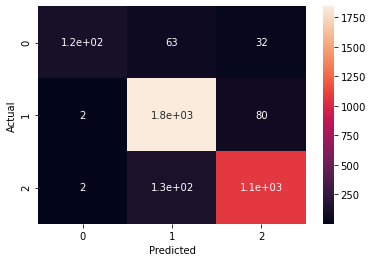

In [93]:
print("Tamaño de muestra :",len(X_test))
print("Precisión : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Curva ROC<h2>

[[0.04 0.96]
 [0.04 0.96]
 [0.   1.  ]
 ...
 [0.16 0.84]
 [0.02 0.98]
 [0.16 0.84]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.990


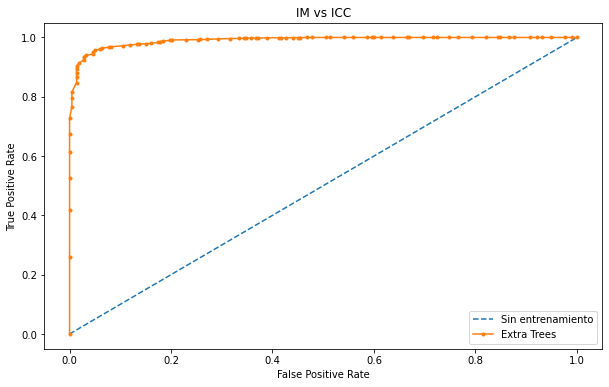

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = classifier.predict_proba(X_test)
print(lr_probs)
lr_probs = lr_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

fig = plt.figure(figsize=(10,6))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenamiento')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Extra Trees')

plt.title("IM vs ICC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
fig.savefig('ROC_IMvsICC.png')


<h2>Curva recall<h2>

Extra trees: f1=0.976 auc=0.999


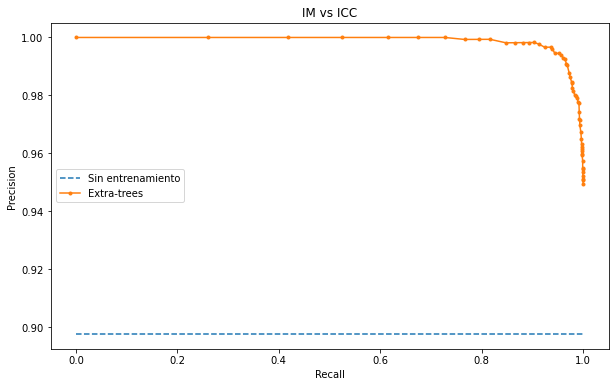

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

fig = plt.figure(figsize=(10,6))
lr_probs = classifier.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
yhat = classifier.predict(X_test)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

print('Extra trees: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenamiento')
plt.plot(lr_recall, lr_precision, marker='.', label='Extra-trees')

plt.title('IM vs ICC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
fig.savefig('r-c_AFvsIM.png')


<h2>Histogramas<h2>

C:\Users\jcruz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jcruz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jcruz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

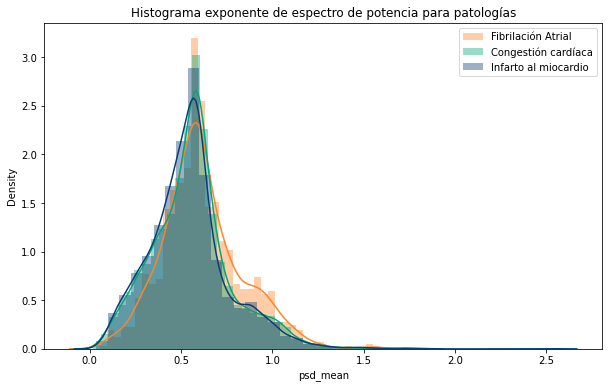

In [10]:
dfa_af=a_f["psd_mean"]
dfa_cc=c_c["psd_mean"]
dfa_mi=m_i["psd_mean"]

fig = plt.figure(figsize=(10,6))

sn.distplot(a=dfa_af,bins=40,color='#FF8427',kde=True,label="Fibrilación Atrial")
sn.distplot(a=dfa_cc,bins=40,color='#04A777',kde=True,label="Congestión cardíaca")
sn.distplot(a=dfa_mi,bins=40,color='#083D77',kde=True,label="Infarto al miocardio")

plt.title("Histograma exponente de espectro de potencia para patologías")
plt.legend()
fig.savefig("graf/h3/hist_psd(s).png")

<h2>Gráficas de dispersión<h2>

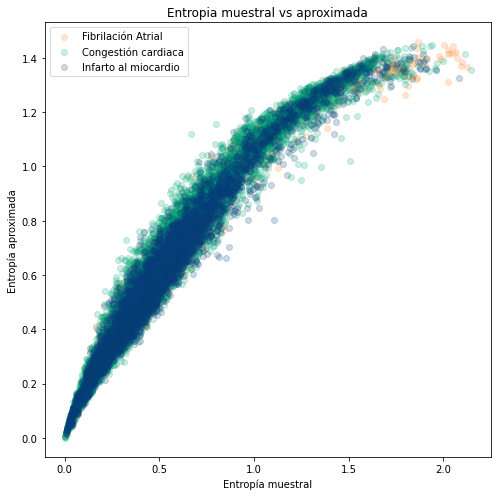

In [14]:
np_pop = np.array(atrial_f["psd_mean"])*100
np_pop1 = np.array(congestive_h["psd_mean"])*100
np_pop2 = np.array(myocardial_i["psd_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["se_mean"],atrial_f["ae_mean"],color='#FF8427',alpha=0.2)
b=plt.scatter(congestive_h["se_mean"],congestive_h["ae_mean"],color='#04A777',alpha=0.2)
c=plt.scatter(myocardial_i["se_mean"],myocardial_i["ae_mean"],color='#083D77',alpha=0.2)

plt.title("Entropia muestral vs aproximada")
plt.legend((a,b,c),("Fibrilación Atrial","Congestión cardiaca","Infarto al miocardio"))
plt.axis
plt.xlabel("Entropía muestral")
plt.ylabel("Entropía aproximada")
plt.savefig(('graf/s3/scatter(sevsae)p.png'))
plt.show()